In [4]:
import gzip
import numpy as np
import matplotlib.pyplot as plt
import timeit

# Conjunto Treino:

### Acessando os Labels do Conjunto Treino:

In [5]:
file_train_labels = gzip.open('train-labels-idx1-ubyte.gz','r')

file_train_labels.read(8)

buf_train_labels = file_train_labels.read(6000)

data_train_labels = np.frombuffer(buf_train_labels, dtype=np.uint8).astype(np.int32)

train_labels = data_train_labels

# Pritando os labels do Conjunto Treino
print(train_labels[:10])

[5 0 4 1 9 2 1 3 1 4]


### Acessando as Imagens do Conjunto Treino:

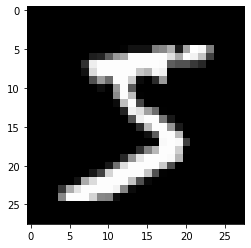

Foto 1



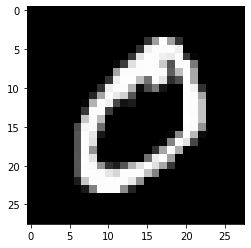

Foto 2



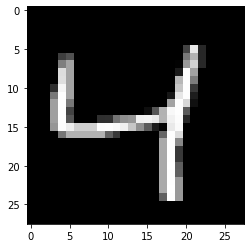

Foto 3



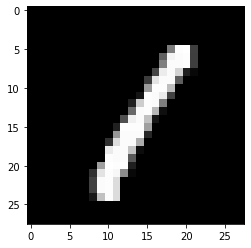

Foto 4



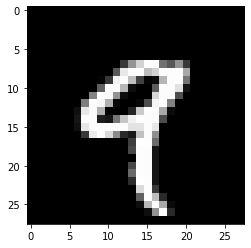

Foto 5



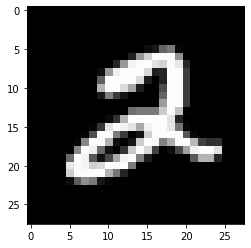

Foto 6



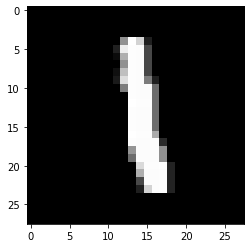

Foto 7



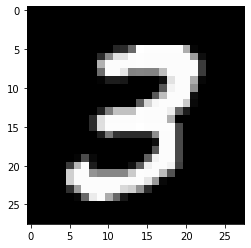

Foto 8



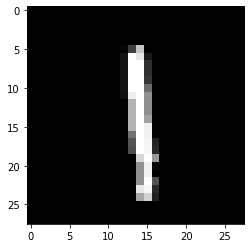

Foto 9



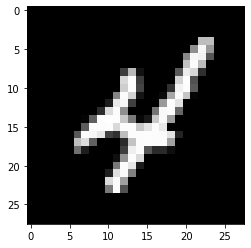

Foto 10



In [6]:
file_train_images = gzip.open('train-images-idx3-ubyte.gz','r')

image_size = 28
num_images_train = 6000

file_train_images.read(16)

buf_train_images = file_train_images.read(image_size * image_size * num_images_train)

data_train_images = np.frombuffer(buf_train_images, dtype=np.uint8).astype(np.float32)
data_train_images = data_train_images.reshape(num_images_train, image_size, image_size, 1)

train_images = data_train_images

# Plot das Imagens do Conjunto Treino
for i in range(0, 10):
    plt.imshow(np.asarray(data_train_images[i]).squeeze(), cmap='gray')
    plt.show()
    print("Foto {}".format(i+1))
    print()

# Conjunto Teste:

### Acessando os Labels do Conjunto Teste:

In [7]:
file_test_labels = gzip.open('t10k-labels-idx1-ubyte.gz','r')

file_test_labels.read(8)

buf_test_labels = file_test_labels.read(1000)

data_test_labels = np.frombuffer(buf_test_labels, dtype=np.uint8).astype(np.int32)

test_labels = data_test_labels

# Pritando os labels do Conjunto Teste
print(test_labels[:10])

[7 2 1 0 4 1 4 9 5 9]


### Acessando as Imagens do Conjunto Teste:

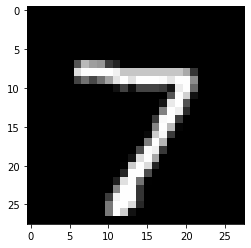

Foto 1



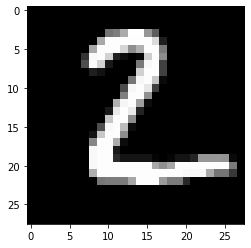

Foto 2



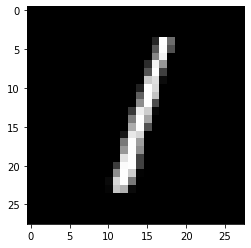

Foto 3



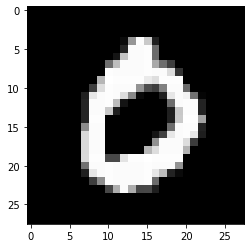

Foto 4



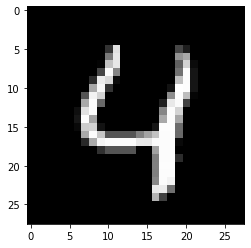

Foto 5



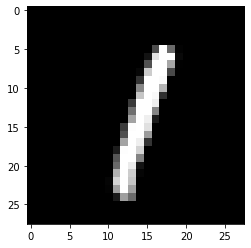

Foto 6



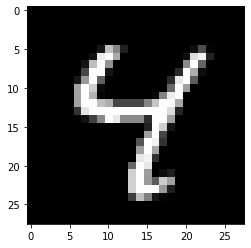

Foto 7



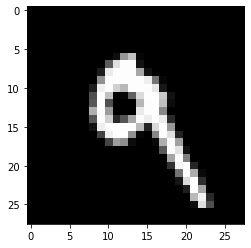

Foto 8



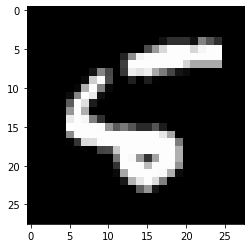

Foto 9



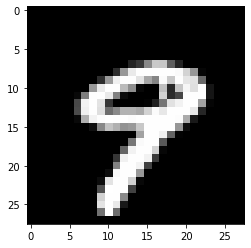

Foto 10



In [8]:
file_test_images = gzip.open('t10k-images-idx3-ubyte.gz','r')

image_size = 28
num_images_test = 1000

file_test_images.read(16)

buf_test_images = file_test_images.read(image_size * image_size * num_images_test)

data_test_images = np.frombuffer(buf_test_images, dtype=np.uint8).astype(np.float32)
data_test_images = data_test_images.reshape(num_images_test, image_size, image_size, 1)

test_images = data_test_images

for i in range(0, 10):
    plt.imshow(np.asarray(data_test_images[i]).squeeze(), cmap='gray')
    plt.show()
    print("Foto {}".format(i+1))
    print()

# Tratamento das Imagens:

### Tratando as imagens do Conjunto Treino:

In [9]:
# Criando matriz de dados Não-Centralizada

X_train = np.asarray(train_images).squeeze().reshape(num_images_train, 784)
print(X_train.shape)

(6000, 784)


In [10]:
# Calculando media e centralizando dados
train_mean = np.mean(X_train, axis = 0)

X_train = (X_train - train_mean)
print(X_train.shape)

(6000, 784)


In [11]:
# Decomposição de Valor Singular - SVD
start_time = timeit.default_timer()

U_train, S_train, Vt_train = np.linalg.svd(X_train, full_matrices=False)
V_train = Vt_train.T

elapsed = timeit.default_timer() - start_time

print('U shape =', np.shape(U_train), 'S length =', np.shape(S_train), 'Vt shape =', np.shape(Vt_train))
print('Tempo de processamento: {:6.2f} s'.format(elapsed))

U shape = (6000, 784) S length = (784,) Vt shape = (784, 784)
Tempo de processamento:   0.84 s


In [12]:
# Calculando a matriz P (ou Y - Dados Artificiais)
P_train = np.dot(X_train,V_train)
print(P_train.shape)

(6000, 784)


In [25]:
# Estabelecendo número de autovalores a ser utilizado para remodelar a imagem
autovalor_num = 50

In [26]:
# Criando a Matriz Final
X_train = np.dot(P_train[:,:autovalor_num], V_train.T[:autovalor_num,:])
print(X_train.shape)

(6000, 784)


In [27]:
# Retonando a media
X_train = (X_train + train_mean)
print(X_train.shape)

(6000, 784)


In [28]:
# Voltando ao formato imagem
train_image_plot = X_train[0] # Foi escolhido como exemplo a image[0], ou seja primeira imagem do Conjunto Treino
print(train_image_plot.shape)

(784,)


In [29]:
train_image_plot = train_image_plot.reshape((28, 28))
print(train_image_plot.shape)

(28, 28)


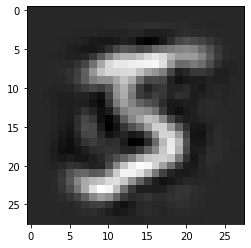

In [30]:
# Plot da imagem final (Exemplo)
train_image_plot = np.asarray(train_image_plot)
plt.imshow(train_image_plot, cmap='gray')
plt.show()

### Tratando as imagens do Conjunto Teste:

In [16]:
# Criando matriz de dados Não-Centralizada

X_test = np.asarray(test_images).squeeze().reshape(num_images_test, 784)
print(X_test.shape)

(1000, 784)


In [24]:
np.dot(X_test, Vt_train[0:50,:].transpose()).shape

(1000, 50)

# Resultado:

### Reconhecimento (Usando Distância Euclidiana):

In [17]:
start_time = timeit.default_timer()

successes = 0

for i in range(0, num_images_test):
    
    image_test_recognition = X_test[i].reshape((784, 1))
    image_train_recognition = X_train[0].reshape((784, 1))
    
    aux_image = image_test_recognition - image_train_recognition
    min_distance = np.linalg.norm(aux_image)
    
    index = 0
    
    for j in range(0, num_images_train):
        
        image_train_recognition = X_train[j].reshape((784, 1))
        
        aux_image = image_test_recognition - image_train_recognition
        
        if np.linalg.norm(aux_image) < min_distance:
            min_distance = np.linalg.norm(aux_image)
            index = j
                
    if test_labels[i] == train_labels[index]:
        successes += 1
    
    min_distance = 0

print("Accuracy = {:.2f}% | {} successes".format((successes/num_images_test)*100, successes))

elapsed = timeit.default_timer() - start_time
print('Tempo de processamento: {:6.2f} s'.format(elapsed))

Accuracy = 92.70% | 927 successes
Tempo de processamento:  49.10 s


In [18]:
# Accuracy (Autovalores)

# - 10 Autovalores - 86.20% (862 successes)
# - 50 Autovalores - 92.70% (927 successes)
# - 100 Autovalores - 92,00% (920 sucesses)

# - list_num_autovalor = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500, 600, 700, 784]
# Accuracy = 86.20% | 862 successes
# Accuracy = 92.10% | 921 successes
# Accuracy = 93.10% | 931 successes
# Accuracy = 93.40% | 934 successes
# Accuracy = 92.70% | 927 successes
# Accuracy = 92.80% | 928 successes
# Accuracy = 92.40% | 924 successes
# Accuracy = 92.10% | 921 successes
# Accuracy = 92.20% | 922 successes
# Accuracy = 92.00% | 920 successes
# Accuracy = 91.10% | 911 successes
# Accuracy = 90.80% | 908 successes
# Accuracy = 90.40% | 904 successes
# Accuracy = 90.40% | 904 successes
# Accuracy = 90.50% | 905 successes
# Accuracy = 90.40% | 904 successes
# Accuracy = 90.40% | 904 successes

# Gráficos:

### Gráfico da Acurácia X Número de Valores Singulares:

In [25]:
start_time = timeit.default_timer()

list_num_autovalor = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500, 600, 700, 784]
list_accuracy = []

for num_autovalor in range(10, 784, 10):
    
    # Criando a Matriz Final
    X_train = np.dot(P_train[:,:num_autovalor], V_train.T[:num_autovalor,:])
    
    # Retonando a media
    X_train = (X_train + train_mean)
    
    successes = 0

    for i in range(0, num_images_test):

        image_test_recognition = X_test[i].reshape((784, 1))
        image_train_recognition = X_train[0].reshape((784, 1))

        aux_image = image_test_recognition - image_train_recognition
        min_distance = np.linalg.norm(aux_image)

        index = 0

        for j in range(0, num_images_train):

            image_train_recognition = X_train[j].reshape((784, 1))

            aux_image = image_test_recognition - image_train_recognition

            if np.linalg.norm(aux_image) < min_distance:
                min_distance = np.linalg.norm(aux_image)
                index = j

        if test_labels[i] == train_labels[index]:
            successes += 1

        min_distance = 0
    
    accuracy = (successes/num_images_test)*100
    list_accuracy.append(accuracy)
    
    print("Accuracy = {:.2f}% | {} successes".format(accuracy, successes))

elapsed = timeit.default_timer() - start_time
print('Tempo de processamento: {:6.2f} s'.format(elapsed))

Accuracy = 86.20% | 862 successes
Accuracy = 92.10% | 921 successes
Accuracy = 93.10% | 931 successes
Accuracy = 93.40% | 934 successes
Accuracy = 92.70% | 927 successes
Accuracy = 92.80% | 928 successes
Accuracy = 92.40% | 924 successes
Accuracy = 92.10% | 921 successes
Accuracy = 92.20% | 922 successes
Accuracy = 92.00% | 920 successes
Accuracy = 91.90% | 919 successes
Accuracy = 91.80% | 918 successes
Accuracy = 91.90% | 919 successes
Accuracy = 91.70% | 917 successes
Accuracy = 91.80% | 918 successes
Accuracy = 91.50% | 915 successes
Accuracy = 91.40% | 914 successes
Accuracy = 91.20% | 912 successes
Accuracy = 91.20% | 912 successes
Accuracy = 91.10% | 911 successes
Accuracy = 91.20% | 912 successes
Accuracy = 90.90% | 909 successes
Accuracy = 90.90% | 909 successes
Accuracy = 91.10% | 911 successes
Accuracy = 90.90% | 909 successes
Accuracy = 90.70% | 907 successes
Accuracy = 90.90% | 909 successes
Accuracy = 90.90% | 909 successes
Accuracy = 90.90% | 909 successes
Accuracy = 90.

In [31]:
plt.plot(np.arange(10, 784, 10), list_accuracy)
plt.xlabel('Número de Valores Singulares')
plt.ylabel('Acurácia %')
plt.axis([0, 800, 40, 100])
plt.show()

NameError: name 'list_accuracy' is not defined

### Gráfico da Variabilidade Acumulada X Número de Valores Singulares:

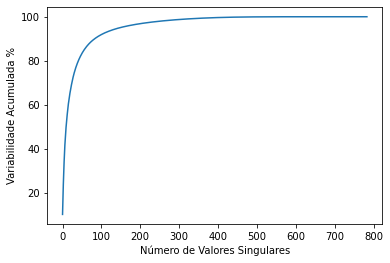

In [21]:
total_var_train = np.sum(S_train**2)
y_plot = np.cumsum(S_train**2) / total_var_train
x_plot = np.array(range(len(S_train)))

plt.plot(x_plot, y_plot*100)
plt.xlabel('Número de Valores Singulares')
plt.ylabel('Variabilidade Acumulada %')
plt.show()